In [0]:
import pandas as pd

df = pd.read_csv("../../OldDataSet.csv")

In [14]:
df

,Profile Pic,Nums/Length Username,Full Name Words,Bio Length,External Url,Private,Verified,Business,#Posts,#Followers,#Following,Fake
0,1,0.000,2,42,1,0,0,0,102,678,405,0
1,1,0.067,2,0,0,0,0,0,58,334,434,0
2,1,0.000,0,0,0,0,0,0,44,539,364,0
3,1,0.000,2,14,0,0,0,0,188,3098,286,0
4,1,0.000,2,0,0,0,0,1,496,1079,1979,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0,0.400,0,0,0,0,0,0,0,14,468,1
1396,1,0.143,3,0,0,0,0,0,20,51,423,1
1397,1,0.000,1,0,0,0,0,0,2,267,3555,1
1398,1,0.000,1,137,0,0,0,0,9,164,4058,1


In [15]:
# Set X array, containing all the values to valuate a Fake Account
# Take the first 11 columns because the algorithm doesn't accept any negative value
X = df.iloc[:, 0:11].values
X[0]

array([  1.,   0.,   2.,  42.,   1.,   0.,   0.,   0., 102., 678., 405.])

In [16]:
# Assign y and print 
y=df.iloc[:,11].values
y

array([0, 0, 0, ..., 1, 1, 1])

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X.shape
# Taken 1200 records and 11 values each to valuate if an account is fake or not

(1400, 11)

In [18]:
# removes all but the k = 4 highest scoring features
X_new = SelectKBest(chi2, k=4).fit_transform(X, y)
X_new.shape

(1400, 4)

In [19]:
X_new[0]

array([ 42., 102., 678., 405.])

Feature ranking:
1. feature 3 (0.350991) #Following
2. feature 0 (0.295418) Bio Length
3. feature 1 (0.184378) #Post
4. feature 2 (0.169213) #Followers


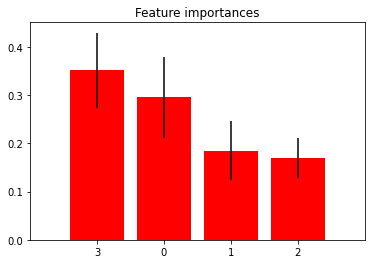

In [20]:
"""
 Feature Importance Forest of Trees
"""
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_new, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

def printColumn(number):
  switcher = {
      0: "Bio Length",
      1: "#Post",
      2: "#Followers",
      3: "#Following",
  }
  return switcher.get(number, "Invalid Column")

for f in range(X_new.shape[1]):
    print("%d. feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], printColumn(indices[f])))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_new.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_new.shape[1]), indices)
plt.xlim([-1, X_new.shape[1]])
plt.show()

In [21]:
"""
  Decision Tree Classifier
"""
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf = clf.fit(X_new, y)

# Train and Test algorithms
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=42)

print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

print(clf.fit(X_train, y_train))

print("TRAIN SET", clf.score(X_train, y_train))
print("TEST  SET", clf.score(X_test, y_test))

938 938
462 462
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)
TRAIN SET 0.9936034115138592
TEST  SET 0.9458874458874459
